In [5]:
import argparse
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist
import imutils
from imutils import contours
from imutils.perspective import four_point_transform

In [6]:
img = cv2.imread("sudoku1.jpg")
img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

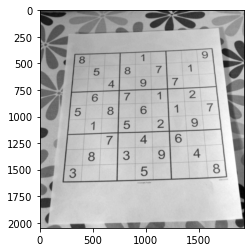

In [7]:
blurred_img = cv2.GaussianBlur(img_gray , (7,7) , 3)
plt.imshow(blurred_img , cmap="gray")

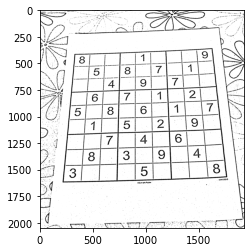

In [8]:
threshold = cv2.adaptiveThreshold(blurred_img , 255 , cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY , 11 , 2)
plt.imshow(threshold , cmap="gray")

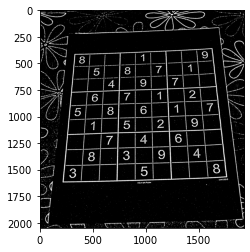

In [9]:
threshold = cv2.bitwise_not(threshold)
plt.imshow(threshold , cmap="gray")

In [10]:
contours = cv2.findContours(threshold , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0]

In [11]:
contours = sorted(contours , key = cv2.contourArea , reverse = True)

In [14]:
sudoku_contour = None

for contour in contours :
    
    epsilon = 0.02 * cv2.arcLength(contour , True)
    approx = cv2.approxPolyDP(contour , epsilon , True)
                              
    if len(approx) == 4:
        sudoku_contour = approx 
        break
        
if sudoku_contour is None:
    print("couldn't find the sudoku table")

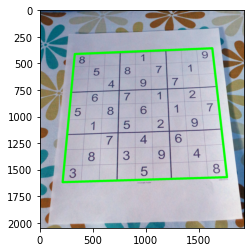

In [15]:
result = cv2.drawContours(img , [sudoku_contour] , -1 ,(0,255,0) , 20)
plt.imshow(result , cmap = "gray")

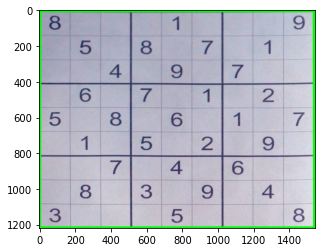

In [17]:
result2 = four_point_transform(img, sudoku_contour.reshape(4,2))
warped = four_point_transform(img_gray, sudoku_contour.reshape(4,2))
plt.imshow(result2, cmap = "gray")